In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [3]:
data_dir_train = pathlib.Path('Train')
data_dir_test = pathlib.Path('Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


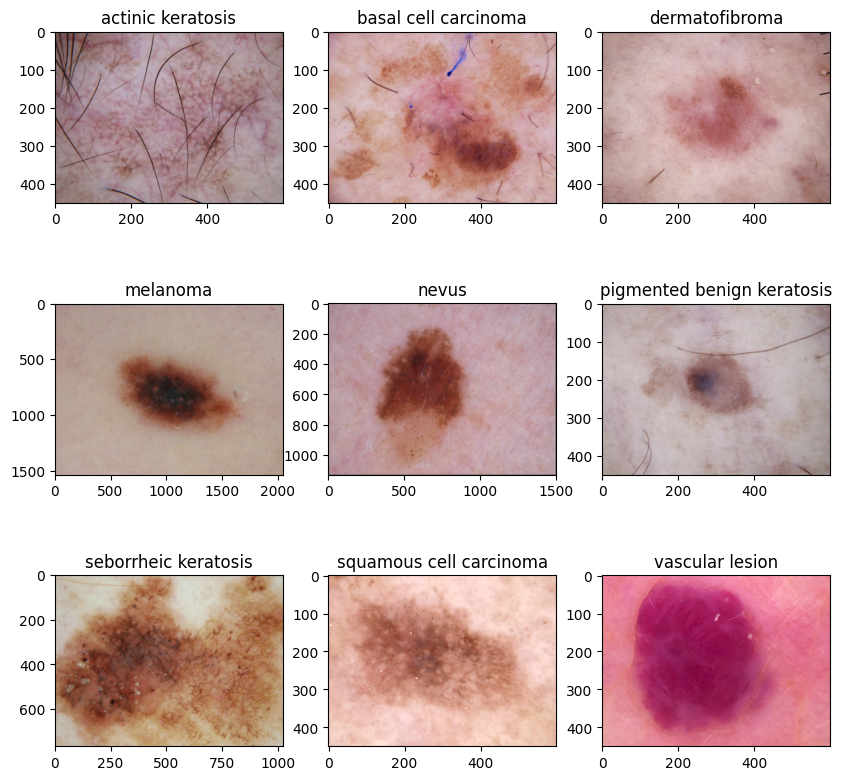

In [10]:
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [11]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


[114, 376, 95, 438, 357, 462, 77, 181, 139]


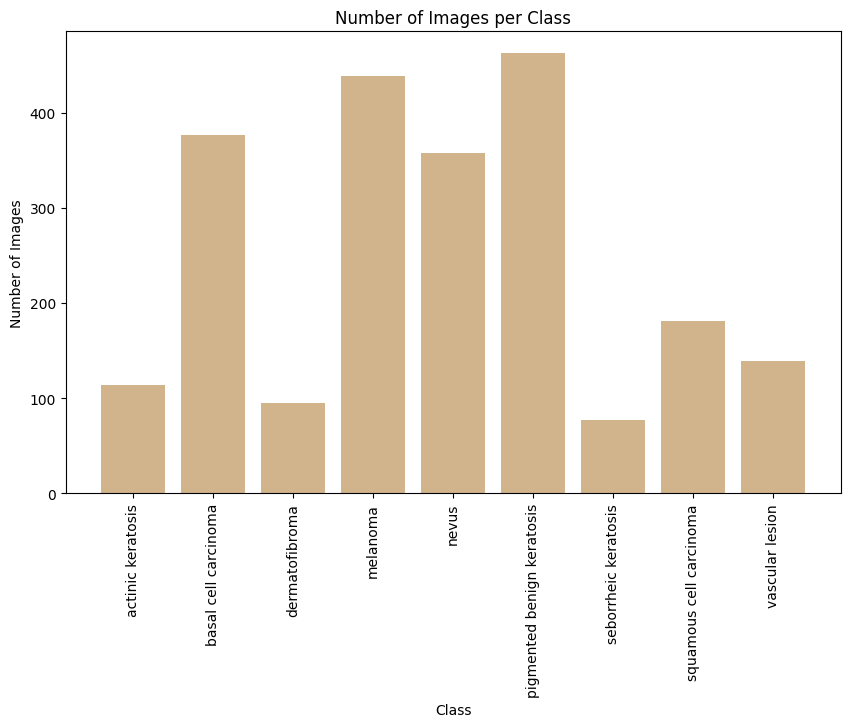

In [12]:
class_names = sorted([item.name for item in data_dir_train.glob('*') if item.is_dir()])

# Count the number of images in each class
num_images_per_class = [len(list(data_dir_train.glob(class_name + '/*.jpg'))) for class_name in class_names]
print(num_images_per_class)
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(class_names, num_images_per_class, color='#D2B48C')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

till here is data preprocessing


In [14]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 9
img_height, img_width = 180, 180  # Make sure these variables are defined

# Updated Sequential Model
model = Sequential([
    layers.Rescaling(1.0/255, input_shape=(img_height, img_width, 3)),

    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPooling2D(),

    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPooling2D(),

    Conv2D(256, 3, padding="same", activation='relu'),
    MaxPooling2D(),

    Conv2D(512, 3, padding="same", activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(1024, activation="relu"),
    Dense(num_classes, activation='softmax')
])


In [15]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,686,025 (56.02 MB)

 Trainable params: 14,686,025 (56.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 870ms/step - accuracy: 0.2391 - loss: 2.0419 - val_accuracy: 0.2506 - val_loss: 1.8884
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 804ms/step - accuracy: 0.2979 - loss: 1.8393 - val_accuracy: 0.3400 - val_loss: 1.7321
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 924ms/step - accuracy: 0.3731 - loss: 1.6791 - val_accuracy: 0.4698 - val_loss: 1.5467
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 991ms/step - accuracy: 0.4643 - loss: 1.5252 - val_accuracy: 0.3714 - val_loss: 1.7444
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 962ms/step - accuracy: 0.4769 - loss: 1.4555 - val_accuracy: 0.4877 - val_loss: 1.5102
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 959ms/step - accuracy: 0.4762 - loss: 1.4310 - val_accuracy: 0.5280 - val_loss: 1.4308
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 969ms/step - accuracy: 0.5260 - loss: 1.3245 - val_accuracy: 0.5034 - val_loss: 1.4170
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 975ms/step - accuracy: 0.4995 - loss: 1.3958 - val_accu

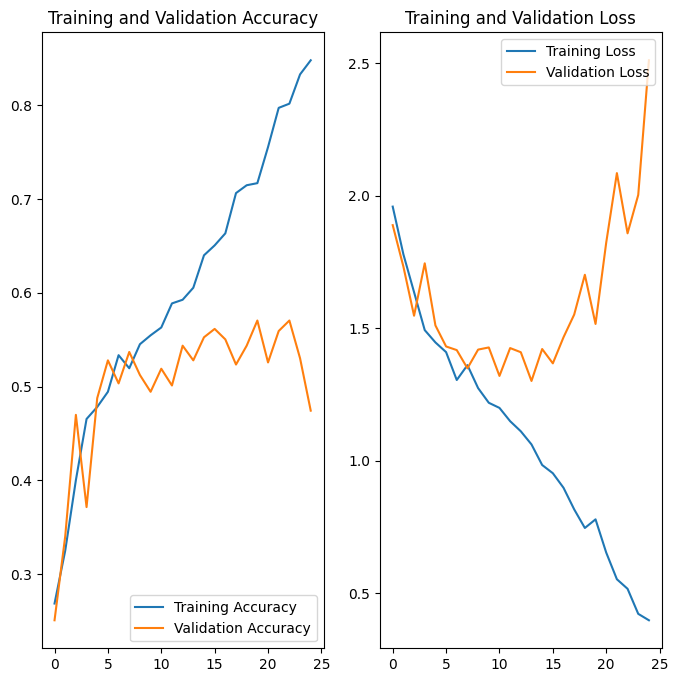

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings :

The model is overfitting because we can see the difference in accuracy in training data & accuracy in the validation data that is almost 20%.

The training accuracy is just around 70-75% with 25 epochos and the model is yet to learn the many features.

data imbalance might be causing the bais to the model.

# Model 2 : Data Augumentation with drop out layer.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define the data augmentation pipeline
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", 
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)


NameError: name 'img_height' is not defined

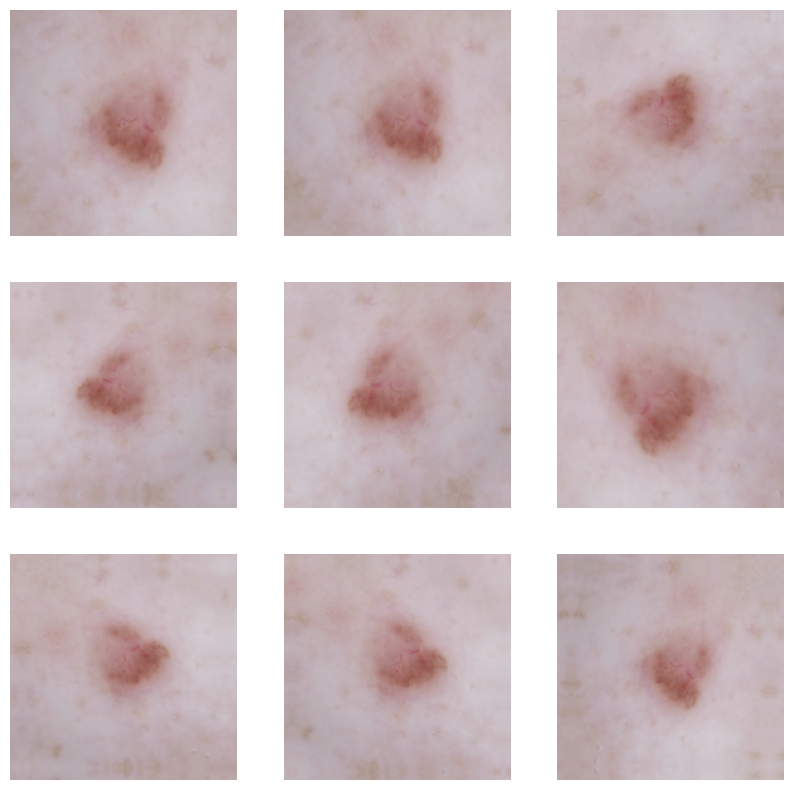

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [20]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

num_classes = 9
img_height, img_width = 180, 180  # Make sure these variables are defined

# Define data augmentation
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

# Define the model
model = Sequential()

# Add data augmentation and rescaling layers
model.add(data_augmentation)
model.add(layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)))

# Add convolutional layers, pooling, and dropout
model.add(Conv2D(32, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3, padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(units=num_classes, activation='softmax'))


In [21]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 668ms/step - accuracy: 0.1831 - loss: 2.4740 - val_accuracy: 0.2058 - val_loss: 2.0520
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 671ms/step - accuracy: 0.2275 - loss: 2.0186 - val_accuracy: 0.2729 - val_loss: 1.9175
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 674ms/step - accuracy: 0.3198 - loss: 1.8347 - val_accuracy: 0.3266 - val_loss: 1.7498
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 665ms/step - accuracy: 0.3920 - loss: 1.6394 - val_accuracy: 0.4787 - val_loss: 1.5253
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 668ms/step - accuracy: 0.4207 - loss: 1.6006 - val_accuracy: 0.4877 - val_loss: 1.4884
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 645ms/step - accuracy: 0.4476 - loss: 1.5772 - val_accuracy: 0.4832 - val_loss: 1.5236
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 671ms/step - accuracy: 0.4848 - loss: 1.4512 - val_accuracy: 0.4877 - val_loss: 1.5078
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 668ms/step - accuracy: 0.4626 - loss: 1.5404 - val_accu

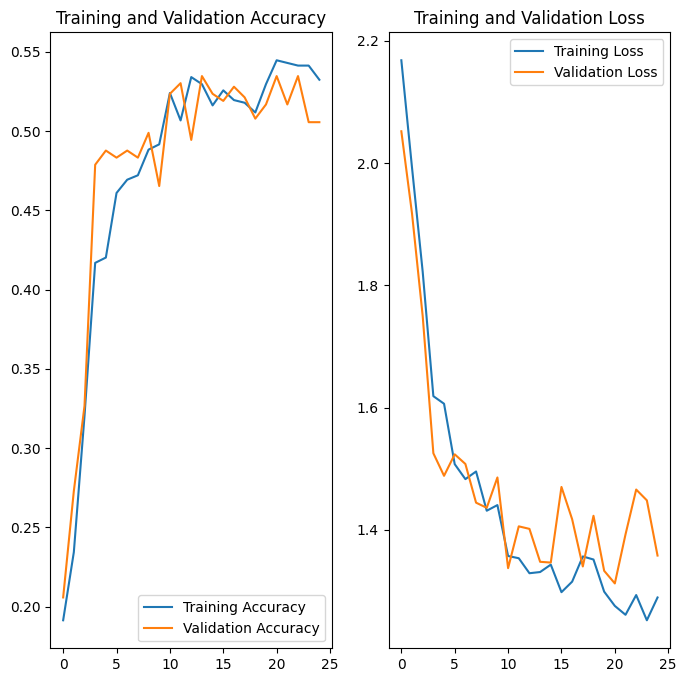

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Findings:
    
With data agumenatation and drop layer, the overfitting of the model is adressed to great extend. Earlier the train and validation accuracy difference was nearly 20%, with latest approach it's reduced to 2-3%.

The accuracy of the model is compromised heavily and decreased by fair bit from previous venilla model.

Considering above 2 points, there is still a scope of lot of improvement of the model.

# Augmentor : Class balance

In [24]:
import os
output_directory = os.getcwd() + '/augmented_images/'

In [25]:
# List all directories (classes) in the data directory
class_names = os.listdir(data_dir_train)

# Iterate through each class and count the number of images
for class_name in class_names:
    class_path = os.path.join(data_dir_train, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        num_images = len(os.listdir(class_path))
        print(f'Class: {class_name}, Number of Images: {num_images}')

Class: actinic keratosis, Number of Images: 114
Class: basal cell carcinoma, Number of Images: 376
Class: dermatofibroma, Number of Images: 95
Class: melanoma, Number of Images: 438
Class: nevus, Number of Images: 357
Class: pigmented benign keratosis, Number of Images: 462
Class: seborrheic keratosis, Number of Images: 77
Class: squamous cell carcinoma, Number of Images: 181
Class: vascular lesion, Number of Images: 139


In [26]:
import Augmentor
import os
import pathlib

# Define the path to the training dataset
path_to_training_dataset = pathlib.Path('Train')
output_directory = os.getcwd() + '/data/'

# Convert class_names to a list if it's not already
class_names = list(class_names)

# Iterate through each class and create Augmentor pipeline
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), output_directory=str(output_directory + i + '/output/'))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)


Initialised with 114 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/actinic keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F02509B450>: 100%|██████████| 500/500 [00:03<00:00, 132.13 Samples/s]


Initialised with 376 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F025069250>: 100%|██████████| 500/500 [00:03<00:00, 144.26 Samples/s]


Initialised with 95 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/dermatofibroma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F02502A6D0>: 100%|██████████| 500/500 [00:03<00:00, 135.09 Samples/s]


Initialised with 438 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/melanoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=722x542 at 0x1F025199AD0>: 100%|██████████| 500/500 [00:17<00:00, 29.39 Samples/s]  


Initialised with 357 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F02511AED0>: 100%|██████████| 500/500 [00:18<00:00, 27.55 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/pigmented benign keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1F02506E390>: 100%|██████████| 500/500 [00:03<00:00, 137.61 Samples/s]


Initialised with 77 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1F022B77DD0>: 100%|██████████| 500/500 [00:07<00:00, 65.08 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F0230DF5D0>: 100%|██████████| 500/500 [00:03<00:00, 132.14 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to c:\Users\Admin\Desktop\ML\Skin cancer ISIC The International Skin Imaging Collaboration/data/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1F022A24AD0>: 100%|██████████| 500/500 [00:03<00:00, 126.05 Samples/s]                  


In [27]:
output_dir = pathlib.Path(output_directory)  # Convert output directory to a Path object
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

9001


total training image count = 9001 

-------------------------------------
Class name =  actinic keratosis
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  basal cell carcinoma
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  dermatofibroma
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  melanoma
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  nevus
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  pigmented benign keratosis
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  seborrheic keratosis
count      =  1000
proportion =  0.11109876680368848
-------------------------------------
Class name =  squamous cell carcinoma
count      =  1001
proportion =  0.1

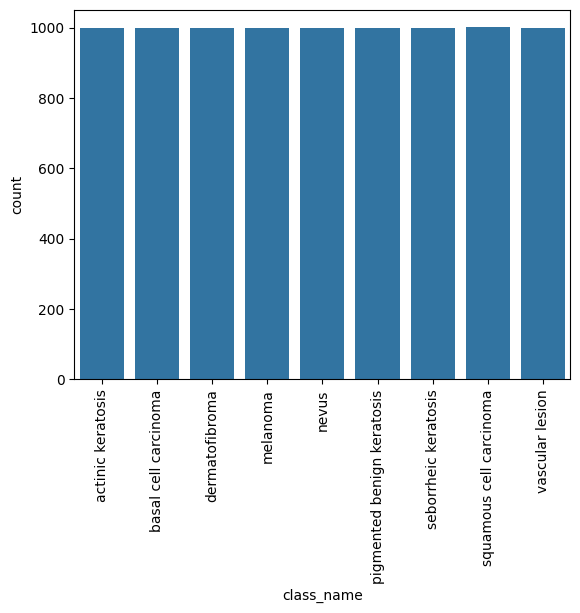

In [28]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])
temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

# Model 3 : Model with Class balance data.

In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9001 files belonging to 9 classes.
Using 7201 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9001 files belonging to 9 classes.
Using 1800 files for validation.


In [31]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [49]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

num_classes = 9
img_height, img_width = 180, 180  # Define the image dimensions

# Define the model
model1 = Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),  # Updated rescaling layer
    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    
    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.15),
    
    Conv2D(256, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.20),
    
    Conv2D(512, 3, padding="same", activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(units=num_classes, activation='softmax')
])


In [50]:
opt = Adam(learning_rate=0.001)
model1.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 25
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 614ms/step - accuracy: 0.1066 - loss: 2.2439 - val_accuracy: 0.1106 - val_loss: 2.1969
Epoch 2/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 677ms/step - accuracy: 0.1097 - loss: 2.1967 - val_accuracy: 0.1039 - val_loss: 2.1980
Epoch 3/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 151s 668ms/step - accuracy: 0.1078 - loss: 2.1979 - val_accuracy: 0.1039 - val_loss: 2.1980
Epoch 4/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 643ms/step - accuracy: 0.1073 - loss: 2.1975 - val_accuracy: 0.1061 - val_loss: 2.1976
Epoch 5/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 643ms/step - accuracy: 0.1138 - loss: 2.1980 - val_accuracy: 0.1122 - val_loss: 2.1978
Epoch 6/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 644ms/step - accuracy: 0.1160 - loss: 2.1981 - val_accuracy: 0.1039 - val_loss: 2.1982
Epoch 7/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 147s 649ms/step - accuracy: 0.1059 - loss: 2.1981 - val_accuracy: 0.1039 - val_loss: 2.1980
Epoch 8/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 645ms/step - accuracy: 0.1066 -

In [52]:
model1.save("_model1_cnn.h5")

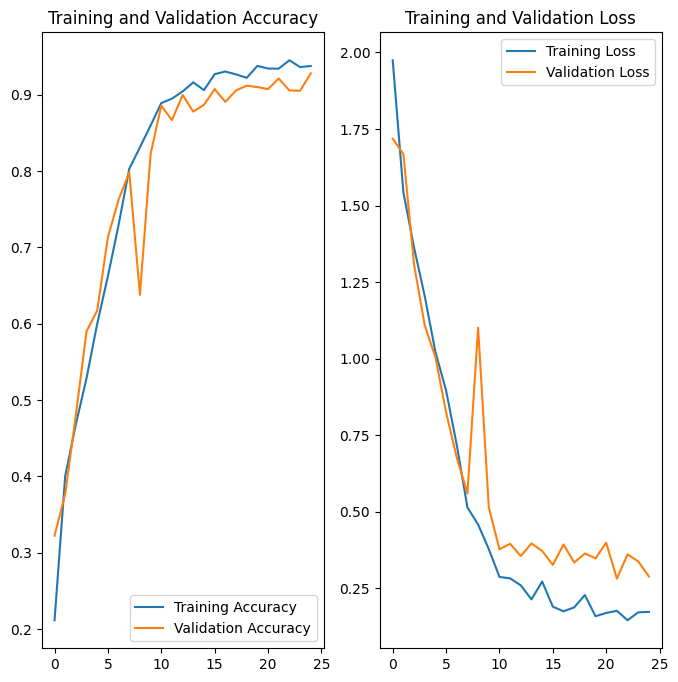

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model : Transfer learning Model

## RESNET50

In [36]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers



In [37]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=9,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(9, activation='softmax'))

In [38]:
resnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         9,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,695,113 (98.02 MB)

 Trainable params: 2,107,401 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [39]:
# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
resnet_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [40]:
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 623ms/step - accuracy: 0.9509 - loss: 0.1234 - val_accuracy: 0.9233 - val_loss: 0.2975
Epoch 2/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 625ms/step - accuracy: 0.9510 - loss: 0.1259 - val_accuracy: 0.9250 - val_loss: 0.2987
Epoch 3/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 622ms/step - accuracy: 0.9541 - loss: 0.1099 - val_accuracy: 0.9328 - val_loss: 0.3360
Epoch 4/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 622ms/step - accuracy: 0.9562 - loss: 0.1211 - val_accuracy: 0.8994 - val_loss: 0.4241
Epoch 5/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 4281s 19s/step - accuracy: 0.9430 - loss: 0.1592 - val_accuracy: 0.8678 - val_loss: 0.4706
Epoch 6/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 125s 554ms/step - accuracy: 0.9411 - loss: 0.1418 - val_accuracy: 0.9317 - val_loss: 0.2914
Epoch 7/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 128s 568ms/step - accuracy: 0.9516 - loss: 0.1182 - val_accuracy: 0.9256 - val_loss: 0.2894
Epoch 8/25
226/226 ━━━━━━━━━━━━━━━━━━━━ 132s 585ms/step - accuracy: 0.9515 - 

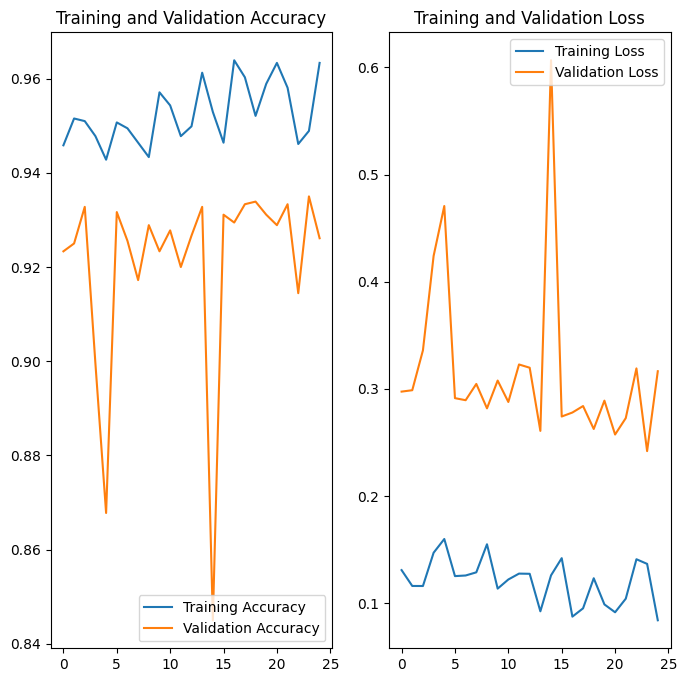

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



1. **Validation Loss Fluctuation:** The validation loss shows some fluctuations across epochs, which might indicate instability in the model's learning process. More stable training could lead to better generalization.

2. **Accuracy Plateau:** The accuracy seems to plateau around 85%, suggesting that the model might have reached its learning capacity or is struggling to improve further. Fine-tuning or adjusting hyperparameters could help address this issue.

In [42]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load and preprocess the image
image_path = 'Train\melanoma\ISIC_0000299.jpg'  # Replace with the path to your image
img = load_img(image_path, target_size=(180, 180))  # Adjust target_size based on your model's input shape
img = img_to_array(img)
img = np.expand_dims(img, axis=0)

# Make a prediction using the skin cancer classification model
prediction = resnet_model.predict(img)

# Debugging information
print("Shape of prediction array:", prediction.shape)
print("Prediction array:", prediction)

# Determine the class label based on the prediction
class_labels = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

# Check if the prediction shape matches the number of classes
if prediction.shape[-1] == len(class_labels):
    class_label = class_labels[np.argmax(prediction)]
    print(f"Predicted class: {class_label}")
else:
    print("Number of classes in prediction does not match the number of class labels.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Shape of prediction array: (1, 9)
Prediction array: [[6.3459121e-04 1.0981994e-02 1.3555851e-02 9.7343385e-01 6.6413378e-07
  7.9990510e-05 1.1593645e-03 1.3984251e-04 1.3941633e-05]]
Predicted class: melanoma


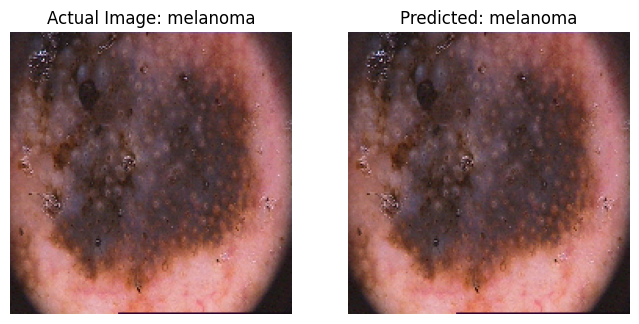

In [43]:
import matplotlib.pyplot as plt

# Load the actual image
actual_img = load_img(image_path, target_size=(180, 180))  # Load the original image

# Plot the actual image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(actual_img)
plt.title(f"Actual Image: {class_label}")
plt.axis('off')

# Plot the predicted image
plt.subplot(1, 2, 2)
plt.imshow(img[0].astype('uint8'))  # Convert to uint8 for imshow
plt.title(f"Predicted: {class_label}")
plt.axis('off')

# Show the plot
plt.show()


In [44]:
model.save("resnet_model_cnn.h5")

## using a dropout layer 

In [45]:
new_resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max',
    classes=9,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable=False
new_resnet_model.add(Flatten())

# Add a Dense layer with 1024 units and ReLU activation
new_resnet_model.add(Dense(512, activation='relu'))
new_resnet_model.add(Dropout(0.25))  # 25% dropout rate
# Add the final Dense layer with 9 units (assuming 9 classes) and softmax activation
new_resnet_model.add(Dense(9, activation='softmax'))

new_resnet_model.build((None, 180, 180, 3))


In [46]:
# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
new_resnet_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [47]:
new_resnet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 97200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    49,766,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,771,529 (189.86 MB)

 Trainable params: 49,771,529 (189.86 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 629ms/step - accuracy: 0.9614 - loss: 0.0971 - val_accuracy: 0.9278 - val_loss: 0.2951
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 625ms/step - accuracy: 0.9524 - loss: 0.1207 - val_accuracy: 0.9344 - val_loss: 0.2918
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 627ms/step - accuracy: 0.9611 - loss: 0.1158 - val_accuracy: 0.9394 - val_loss: 0.2598
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 631ms/step - accuracy: 0.9637 - loss: 0.0819 - val_accuracy: 0.9378 - val_loss: 0.2729
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 144s 636ms/step - accuracy: 0.9608 - loss: 0.1067 - val_accuracy: 0.9317 - val_loss: 0.2600
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 630ms/step - accuracy: 0.9678 - loss: 0.0833 - val_accuracy: 0.9433 - val_loss: 0.2393
Epoch 7/10
216/226 ━━━━━━━━━━━━━━━━━━━━ 2:26 15s/step - accuracy: 0.9654 - loss: 0.0775

KeyboardInterrupt: 

### no improvements found 

AssertionError: View function mapping is overwriting an existing endpoint function: index

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


SystemExit: 1

In [ ]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

app = Flask(__name__)

# Define the path to your pre-trained model
model_path = 'resnet_model_cnn.h5'
model = load_model(model_path)

def process_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

@app.route('/')
def index():
     return render_template(r'C:\Users\Sakshi\OneDrive\Desktop\Skin Data\templates\index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'})

    file = request.files['file']
    img_path = f'static/uploads/{file.filename}'
    file.save(img_path)
    
    img_array = process_image(img_path)
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=3)[0]

    result = [{'label': label, 'probability': float(prob)} for (_, label, prob) in decoded_preds]
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'

 * Debug mode: on



 * Running on http://127.0.0.1:5000

Press CTRL+C to quit

 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
pip install gevent


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, render_template, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os

app = Flask(__name__)

# Define the path to your pre-trained model
model_path = 'resnet_model_cnn.h5'

model = load_model(model_path)

def process_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

@app.route('/')
def index():
    return render_template('indexx.html')